# 데이터 시각화

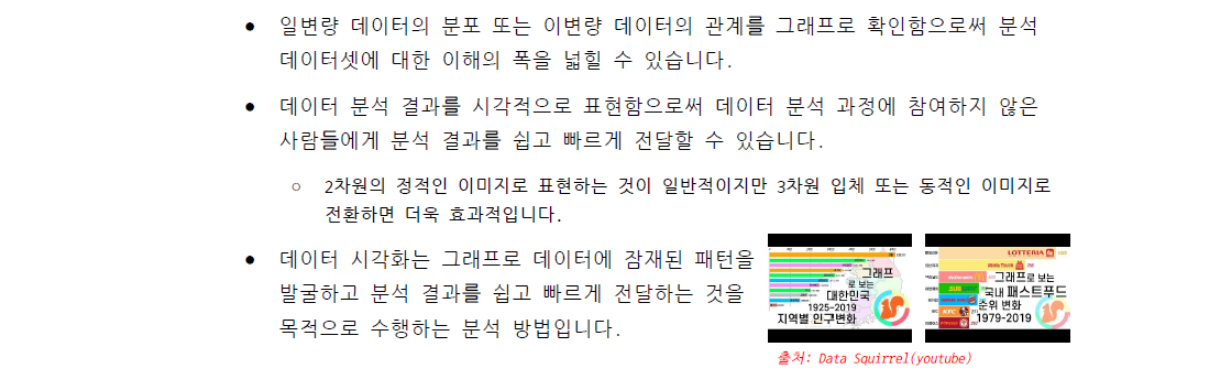

### 데이터 시각화 종류

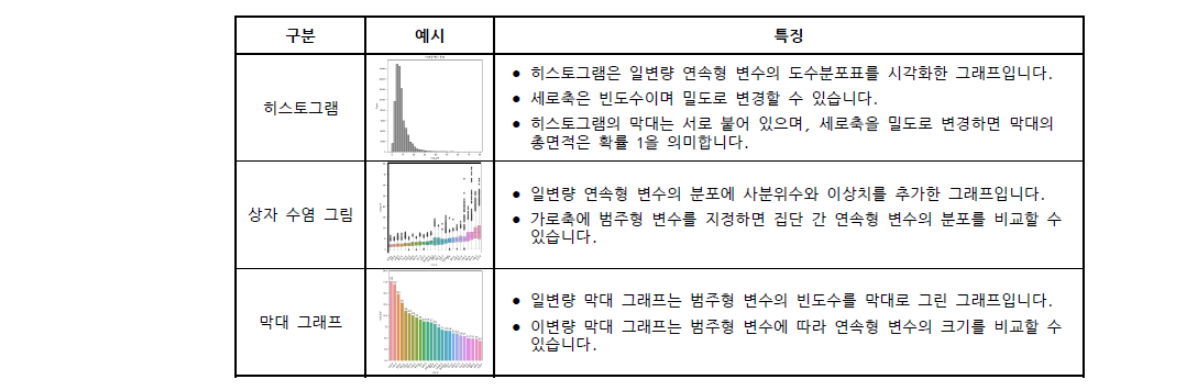

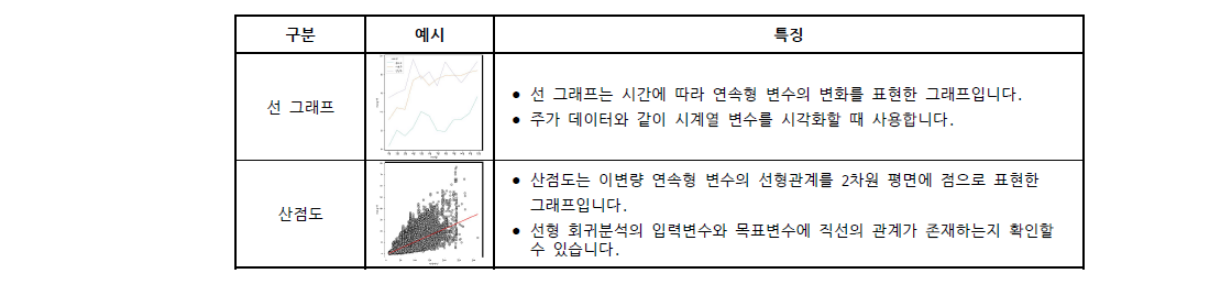

### 관련 라이브러리 호출

In [ ]:
# 관련 라이브러리를 호출합니다.
import os
import chardet
import numpy as np
import pandas as pd
import joblib

### 작업 경로 확인 및 변경

In [ ]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

In [ ]:
# data 폴더로 작업 경로를 변경합니다.
os.chdir(path = '../data')

In [ ]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
os.listdir()

### 실습 데이터셋 준비

In [ ]:
# z 파일을 호출하고 데이터프레임 apt에 할당합니다.
apt = joblib.load(filename = 'APT_List_Seoul_2021.z')

In [ ]:
# apt의 정보를 확인합니다.
apt.info()

In [ ]:
# apt의 처음 5행을 출력합니다.
apt.head()

In [ ]:
# apt의 열이름을 출력합니다.
apt.columns

### 실습 데이터셋 전처리

In [ ]:
# apt에서 필요 없는 열을 삭제합니다.
apt = apt.drop(columns = ['주소', '아파트ID', '아파트명'])

In [ ]:
# apt에 거래월을 추가합니다.
apt['거래월'] = apt['거래일'].dt.strftime(date_format = '%m월')
# 거래일 원소(날짜 데이터)에서 '01월', '02월'형태의 문자열을 생성합니다.

In [ ]:
# apt를 거래월로 오름차순 정렬합니다.
apt = apt.sort_values(by = ['거래월'])

In [ ]:
# apt의 처음 5행을 출력합니다.
apt.head()

### 시각화 설정: 라이브러리 호출

In [ ]:
# 관련 라이브러리를 호출합니다.
import seaborn as sns # 고급 시각화 함수를 포함하는 라이브러리입니다.
import matplotlib.pyplot as plt # 그래프 크기, 제목, 축임름 등일 지정할 때 사용합니다.
import matplotlib.font_manager as fm # 한글 폰트를 지정할 때 사용합니다.

In [ ]:
# 테스트용 그래프를 그립니다.
sns.histplot(data = apt, x = '거래금액')
plt.title(label = '아파트 거래금액 분포'); # [참고] 코드 마지막에 추가한 세미콜론(;)은 plt.show() 함수와 같은 기능을 실행합니다.
# 위 코드를 실행하면 한글을 네모로 출력하므로 한글폰트를 설정해야 합니다.
# [참고] 한글폰트 외 그래프 크기와 해상도 등 다양한 그래픽 파라미터를 설절할 수 있습니다.

### 시각화 설정: 스타일시트

### matplotlib 스타일시트를 설정합니다.

In [ ]:
# matplotlib 라이브러리에서 사용할 수 있는 스타일시트 목록을 확인합니다.
plt.style.available # [참고] 스타일 갤러리 웹페이지를 참고하세요.

In [ ]:
# 그래프에 적용할 스타일시트를 지정합니다.
plt.style.use(style = 'seaborn-white')

NameError: name 'plt' is not defined

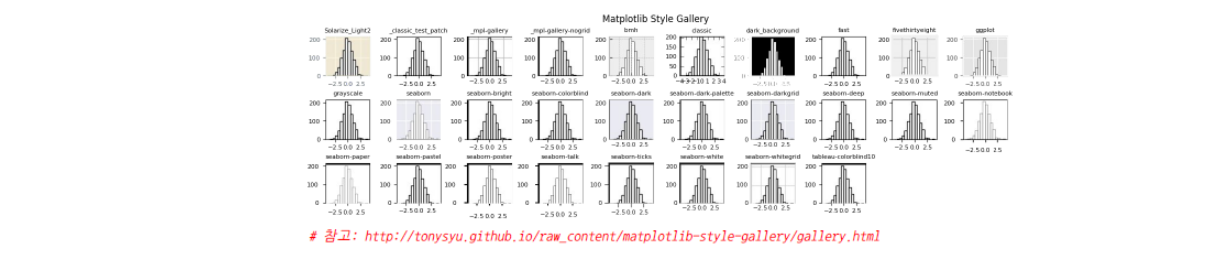

### [참고] Anatomy of a figure

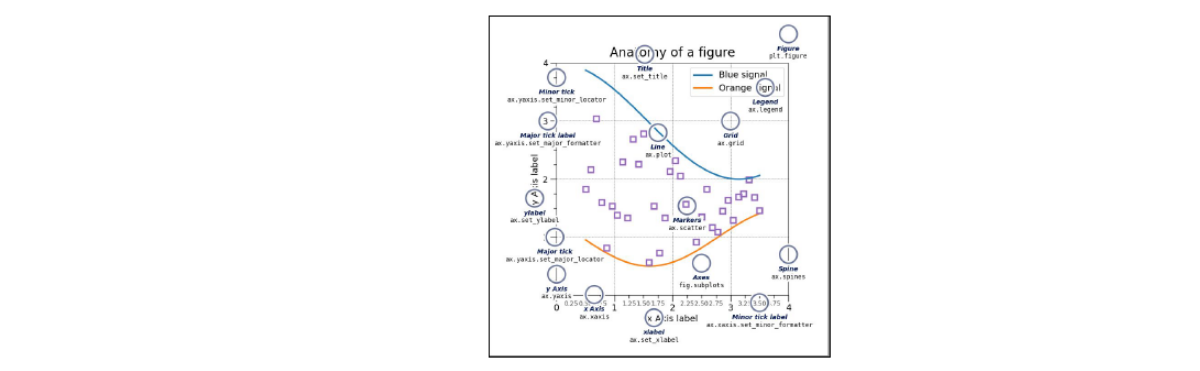

### [참고] matplotlib.pyplot.rc Property Alias

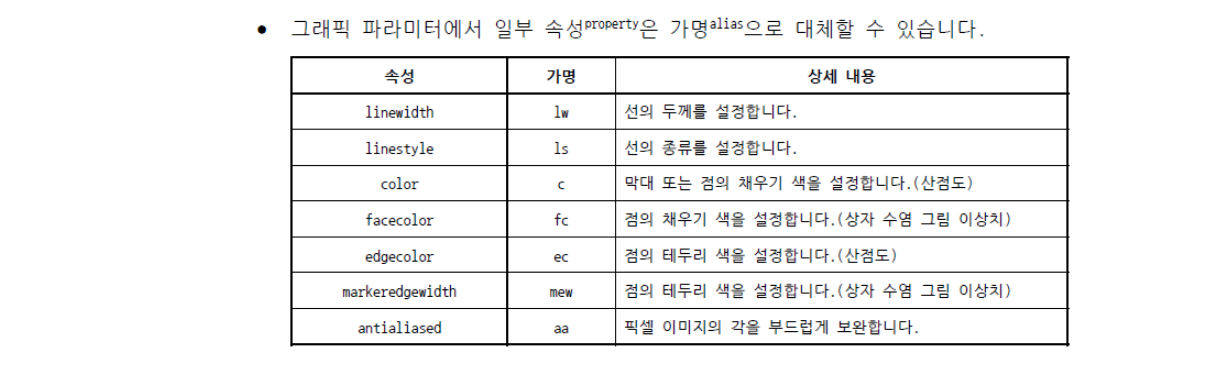

### [참고] 한글폰트 설치

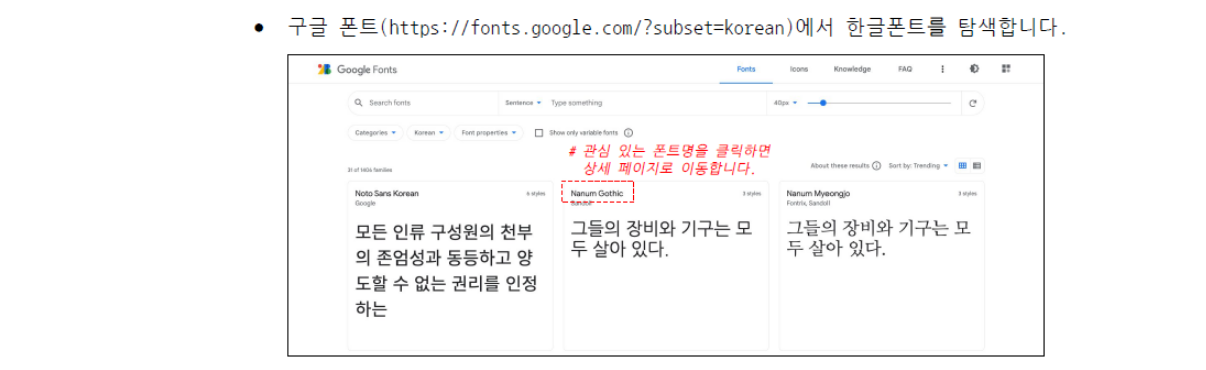

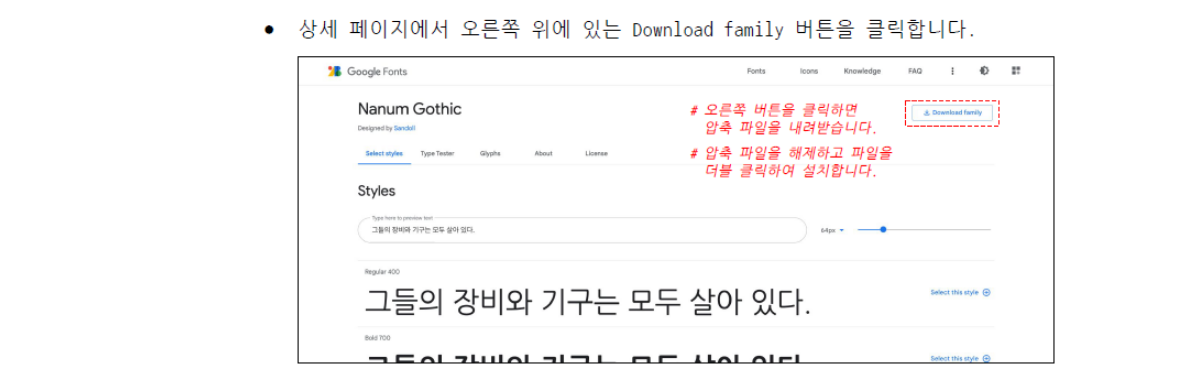

### 시각화 설정: 한글폰트

In [ ]:
# 현재 사용 중인 컴퓨터에 설치한 전체 폰트 파일명을 리스트로 반환합니다.
fontList = fm.findSystemFonts(fontext = 'ttf')
fontList

In [ ]:
# 리스트에서 특정 문자열(폰트명)을 포함하는 파일명만 선택합니다.
fontPath = [font for font in fontList if 'Gamja' in font]
fontPath

In [ ]:
# 반복문으로 컴퓨터에 설치된 폰트명을 출력합니다.
for font in fontPath:
    print(fm.FontProperties(fname = font).get_name())
# 반복문을 실행한 결과에서 마음에 드는 폰트명을 선택하고 plt.rc() 함수에 지정합니다.
# [참고] rc는 runtime configuration를 의미하며, pypplot을 실행하는 환경을 의미합니다.

### 시각화 설정: 그래픽 파라미터

In [ ]:
# 그래프 크기와 해상도를 설정합니다.
plt.rc(group = 'figure', figsize = (8, 4), dpi = 150)

In [ ]:
# 한글폰트와 글자 크기를 설정합니다.
plt.rc(group = 'font', family = 'Gamja Flower', size = 10)

In [ ]:
# 축에 유니코드 마이너스를 출력하지 않도록 설정합니다.
plt.rc(group = 'axes', unicode_minus = False) # [참고] 왼쪽 고드를 설정하지 않으면 음수 앞에 'ㄹ'를 출력합니다.

In [ ]:
# 범례에 채우기 색과 테두리 색을 추가합니다. 
# fc는 facecolor(채우기), ec는 edgecolor(테두리) 관련 매개변수이고 '0'은 검정, '1'은 흰색입니다.
plt.rc(group = 'legend', frameon = True, fc = '1', ec = '0')

### [참고] 한글을 네모로 출력하는 문제 해결 방법

### 한글폰트를 설정했음에도 한글을 네모로 출력하는 에러가 발생할 수 있습니다.
   - 에러 메세지 : Font family ['폰트명'] not found. Falling to DejaVu Sans
   - matplotlib 임시 폴더에서 저장된 json 파일에 해당 한글폰트가 없기 때문입니다.

### json 파일을 삭제하고, Jupyter Notebook을 재실행하면 해결할 수 있습니다.

### 관련 라이브러리를 호출합니다.
###import matplotlib, glob
### [참고] glob.glob() 함수는 조건에 맞는 파일명을 리스트로 반환합니다.

### matplotlib 라이브러리 임시 폴더 경로를 path에 할당합니다.
### path = matplotlib.get_cachedir()

### 폰트 정보를 갖는 json 파일명을 fileName에 할당합니다.
### fileName = glob.glob(pathname = f'{path}/fontlist-*.json')[0]

### matplotlib 라이브러리의 임시 폴더에 있는 json 파일을 삭제합니다.
### os.remove(path = fileName)

### [참고] 그래픽 파라미터 설정 관련 모듈 생성

### 시각화 라이브러리 호출, 스타일시트, 한글폰트 및 그래픽 파라미터를 설정하는 코드를 모듈(py 파일)로 저장하면 필요할 때마다 호출할 수 있으므로 편리합니다.

### Anaconda 메일에서 New Text File을 열고, 모듈(py 파일)로 저장할 시각화 설정 관련된 코드를 붙여넣습니다.

### 상단ㄷ 메뉴에서 File --> Save를 클릭하여 텍스트 파일을 저장합니다.
   - 파일명을 GraphicSetting.py로 변경합니다.

### [주의] py 파일을 현재 사용 중인 Jupyter Notebook 파일과 같은 폴더에 저장하면 쉽게 호출할 수 있습니다.

### 시각화 설정 모듈을 호출합니다.
### from GraphicSetting import *

### [참고] Python 파일 탐색 경로 확인

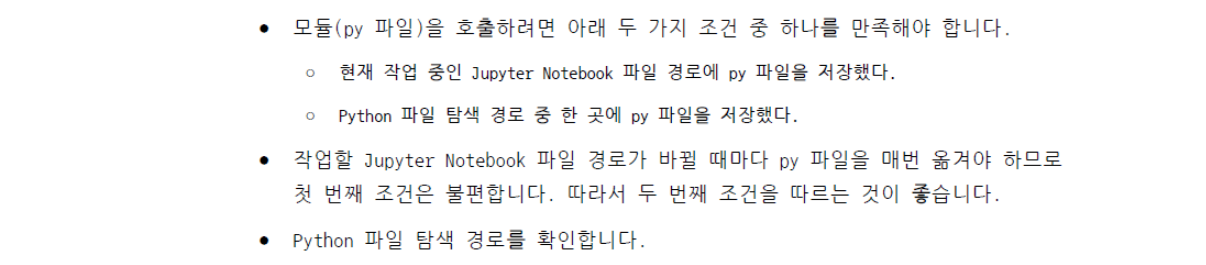

### 히스토그램 그리기

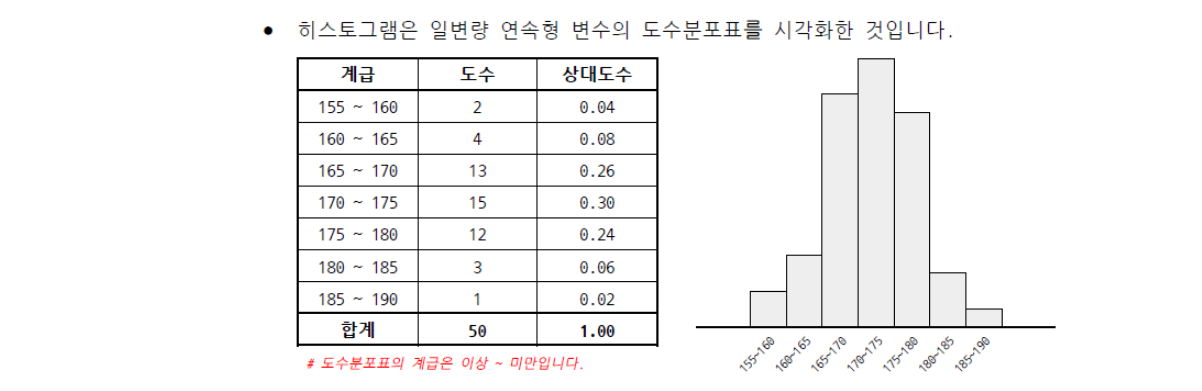

In [ ]:
# 거래금액으로 히스토그램을 그립니다.
sns.histplot(data = apt, x = '거래금액');
# data 매개변수에 데이터프레임을 지정합니다. x 매개변수에 연속형 변수명을 지정합니다.

In [ ]:
# 히스토그램의 막대 개수를 50으로 지정합니다.
sns.histplot(data = apt, x = '거래금액', bins = 50, # bins 매개변수에 막대 개수를 50으로 지정합니다.
             color = '1', edgecolor = '0'); # color 매개변수에 채우기 색, edgecolor 매개변수에 테두리 색을 지정합니다.

In [ ]:
# 히스토그램의 막대 너비를 2로 지정합니다.
sns.histplot(data = apt, x = '거래금액', binwidth = 2, 
             color = '1', edgecolor = '0');
# [참고] bins와 binwidth 매개변수로 히스토그램 막대의 폭을 설정하면 최솟값부터 시작하므로 경계를 명확하게 
# 구분할 수 없다는 단점이 있습니다. 이를 보완하려면 binrange 매개별수에 히스토그램 계급(막대 경계)을 지정합니다.

### 히스토그램에 계급 추가

In [ ]:
# 거래금액 최솟값과 최댓값을 확인합니다.
apt['거래금액'].describe()[['min', 'max']]
# [참고] describe() 함수 실행 결과(시리즈)에서 일부 인덱스만 선택합니다.

In [ ]:
# 히스토그램에 막대 개수와 범위(막대 경계)로 계급을 지정합니다.
sns.histplot(data = apt, x = '거래금액', bins = 60, # [참고] binwidth = 2로 대신할 수 있습니다.
             binrange = (0, 120), # [주의] 히스토그램 계급은 최솟값보다 작거나 같은 값으로 시작하고
                                  # 최댓값보다 크거나 같은 값을 끝나야 합니다.
             color = '1', edgecolor = '0');

### [참고] 색상 목록

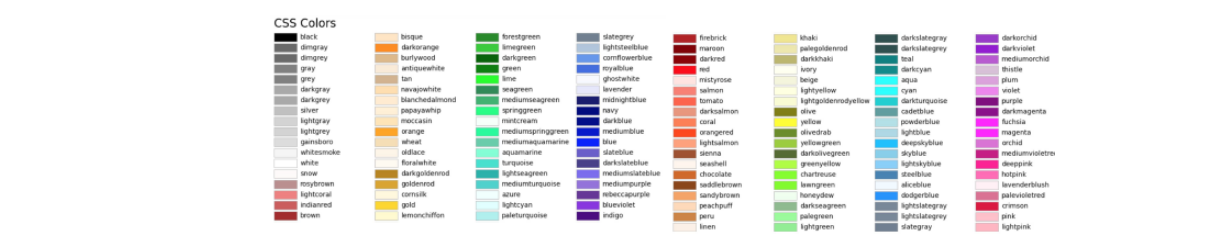

In [ ]:
# 관련 모듈을 호출합니다.
import matplotlib.colors as mcl # 관련 모듈을 호출합니다.

In [ ]:
# 148가지 색이름과 Hex Code를 딕셔너리로 출력합니다.
mcl.CSS4_COLORS
# [출처] http://matplotlib.org/stable/gallery/color/named_colors.html

### 히스토그램 막대 채우기 색 변경

In [ ]:
# 금액구분(범주형 변수)에 따라 채우기 색을 다르게 설정합니다.
sns.histplot(data = apt, x = '거래금액', bins = 60, binrange = (0, 120),
             hue = '금액구분', edgecolor = '0');
             # hue 매개변수에 지정한 범주형 변수의 범주별로 채우기 색을 다르게 설정합니다.

In [ ]:
# 채우기 색 배합을 범주형 변수에 맞는 팔레트로 변경합니다.
sns.histplot(data = apt, x = '거래금액', bins = 60, binrange = (0, 120),
             hue = '금액구분', edgecolor = '0', palette = 'Set1');

### [참고] 팔레트 탐색: Color Brewer

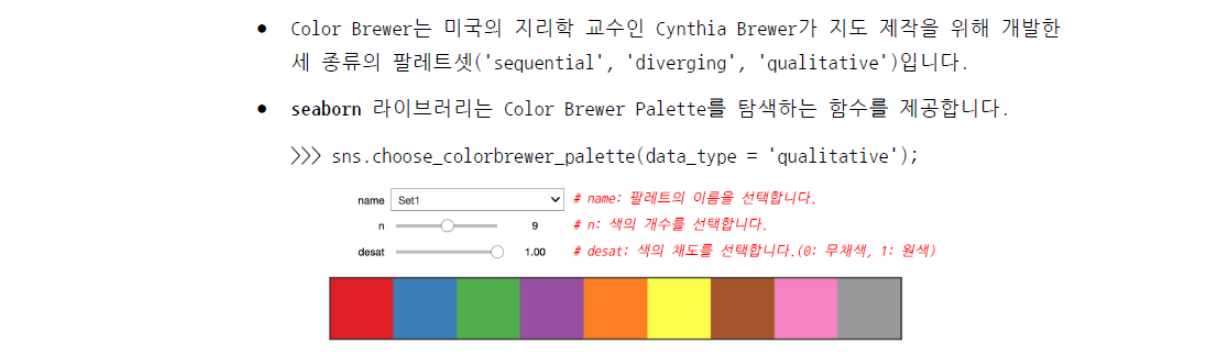

In [ ]:
# Color Brewer Palettet를 탐색합니다.
sns.choose_colorbrewer_palette(data_type = 'qualitative');

### [참고] 팔레트 설정

In [ ]:
# 기본 팔레트 색을 출력합니다.
sns.color_palette() # [참고] 기본 팔레트는 'deep'이며, plt.cm의 한 종류입니다.

In [ ]:
# Color Brewer에서 탐색한 팔레트 색을 출력합니다.
sns.color_palette(palette = 'Set1', n_colors = 9) # [참고] n_colors 매개변수에 색의 개수를 변경할 수 있습니다.

In [ ]:
# 기본 팔레트를 변경합니다.
sns.set_palette(palette = 'Set1', n_colors = 9)

In [ ]:
# 새로 설정한 기본 팔레트 색을 확인합니다.
sns.color_palette()

### [참고] 사용자 팔레트 생성

In [ ]:
# 색이름을 원소로 갖는 리스트(사용자 팔레트)를 생성합니다.
myPal = ['crimson', 'royalblue']

In [ ]:
# 기존 그래프에 사용자 팔레트를 적용합니다.
sns.histplot(data = apt, x = '거래금액', bins = 60, binrange = (0, 120),
             hue = '금액구분', edgecolor = '0', palette = myPal, 
             hue_order = ['5천 미만', '5천 이상']);
            # hue_order 매개변수에 지정한 리스트 원소 순서대로 팔레트 색을 적용합니다.

### 히스토그램에 제목 및 축이름 추가

In [ ]:
# 히스토그램에 제목, x축이름 및 y축이름을 추가합니다.
sns.histplot(data = apt, x = '거래금액', bins = 60, binrange = (0, 120),
             hue = '금액구분', edgecolor = '0', palette = myPal, 
             hue_order = ['5천 미만', '5천 이상'])
plt.title(label = '거래금액의 분포') # 그래프 제목을 추가합니다.
plt.xlabel(xlabel = '매매가격') # x축 이름을 추가합니다.
plt.ylabel(ylabel = '거래건수'); # y축 이름을 추가합니다.

### 히스토그램에 커널 밀도 추정 곡선 추가

In [ ]:
# 히스토그램의 y축을 빈도수(count) 대신 밀도(density)로 변경합니다.
sns.histplot(data = apt, x = '거래금액', bins = 60, binrange = (0, 120),
             color = '1', edgecolor = '0.8', # [참고] 커널 밀도 추정 곡선을 강조하고자 테두리 색을 밝은 회색으로 지정합니다.
             stat = 'density') # stat 매개변수의 기본 인수는 'count'입니다.

# 히스토그램에 커널 밀도 추정 곡선을 추가합니다.
sns.kdeplot(data = apt, x = '거래금액', color = 'red', 
            linewidth = 0.5, linestyle = '-');
# [참고] 커널 밀도 추정은 비모수적인 방법으로 밀도를 추정하는 것으로, 개별 관측값을 중심으로 하는 커널 함수의
#평균을 계산합니다. 대표적인 커널 함수로는 가우시안 함수(정규분포 확률밀도함수)가 있습니다.

NameError: name 'sns' is not defined

### [참고] 선의 종류

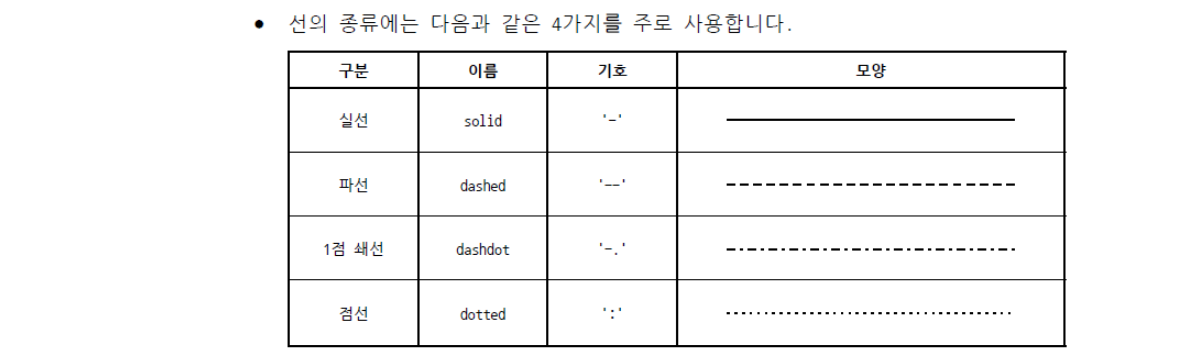

### 관심 있는 자치구 선택

In [ ]:
# apt에서 관심 있는 자치구를 선택하고 sub에 할당합니다.
sub = apt[apt['자치구'].str.contains(pat = '강[남동북]')]

In [ ]:
# 자치구별 거래금액 평균(분포의 중심)을 확인합니다.
sub.groupby(by = ['자치구'])['거래금액'].mean()

In [ ]:
# 거래금액 최솟값과 최댓값을 확인합니다.
sub['거래금액'].describe()[['min', 'max']]

### 히스토그램을 겹쳐서 그리기

In [ ]:
# 자치구별 히스토그램을 겹쳐서 그립니다.
sns.histplot(data = sub, x = '거래금액', bins = 60, binrange = (0, 120),
             hue = '자치구', edgecolor = '0');
            # palette 매개변수를 생략하면 기본 팔레트를 적용합니다.
            # [참고] 현재 기본 팔레트는 'Set1'입니다.

In [ ]:
# 커널 밀도 추정 곡선을 겹쳐서 그리는 것이 더 낫습니다.
sns.kdeplot(data = sub, x = '거래금액', hue = '자치구', shade = True);
# shade 매개변수에 True를 지정하면 커널 밀도 추정 곡선 아래를 기본 팔레트로 채웁니다.

### 히스토그램을 나눠서 그리기

In [ ]:
# 자치구별 히스토그램을 열(가로) 방향으로 나눠서 그립니다.
sns.displot(data = sub, x = '거래금액', bins = 60, binrange = (0, 120),
            hue = '자치구', col = '자치구', # 자치구별 히스토그램을 열(column) 방향으로 출력합니다.
                                            # [참고] row 매개변수를 사용하면 행(row) 방향으로 출력합니다.
            legend = False, # 범례를 추가하지 않습니다(기본값: True)
            height = 3,  # 히스토그램 높이를 지정합니다.(기본값: 5)
            aspect = 0.8); # 히스토그램 폭을 지정합니다.(기본값: 1)

NameError: name 'sns' is not defined

### 상자 수염 그림

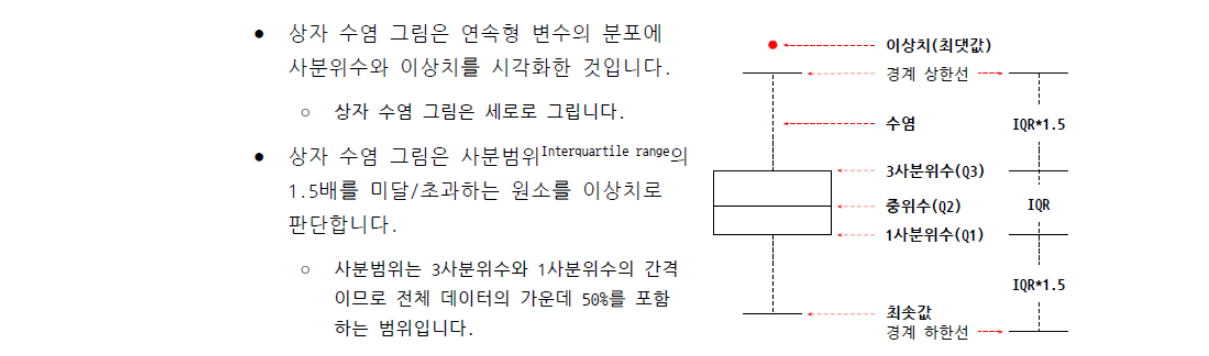

### 일변량 상자 수염 그림 그리기

In [ ]:
# 거래금액으로 상자 수염 그림을 그립니다.
sns.boxplot(data = apt, 
            y = '거래금액', # y 매개변수에 연속형 변수를 지정합니다,
                            # [참고] x 매개변수를 사용하면 상자 수염 그림을 세워서 그립니다.
            color = '1', # 상자 채우기 색을 지정합니다.
                         # [참고] 생략하면 기본 팔레트의 첫 번째 색으로 채웁니다.
            linewidth = 0.5);

In [ ]:
# 이상치 관련 속성으로 딕셔너리를 생성하고 상자 수염 그림에 추가합니다.
outProps = {'marker': 'o', # 이상치 모양을 지정합니다.(기본값: 'd')
            'markersize': 3, # 이상치 크기를 지정합니다.(기본값: 5)
            'markerfacecolor': 'pink', # 이상치 채우기 색을 지정합니다.(기본값: 'black')
            'markeredgecolor': 'red', # 이상치 테두리 색을 지정합니다,(기본값: 'black')
            'markeredgewidth': 0.2} # 이상치 테두리 두께를 성정합니다.(기본값: 1)

sns.boxplot(data = apt, y = '거래금액', color = '1', linewidth = 0.5, 
            flierprops = outProps);

NameError: name 'sns' is not defined

### [참고] marker의 종류

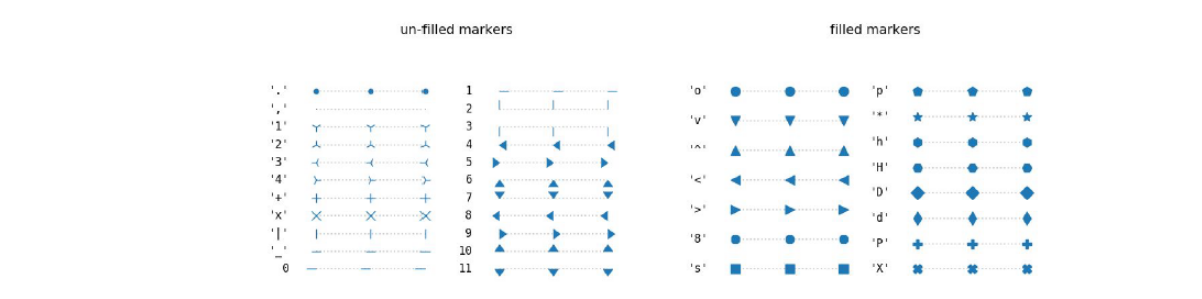

### 이변량 상자 수염 그림 그리기

In [ ]:
# apt의 자치구별 거래금액 중위수를 오름차순 정렬한 grp를 생성합니다.
grp = apt.groupby(by = ['자치구'])['거래금액'].median()
grp = grp.sort_values()
grp.head()

In [ ]:
# x축에 자치구, y축에 거래금액을 지정하고 이변량 상자 수염 그림을 그립니다.
sns.boxplot(data = apt, x = '자치구', y = '거래금액', linewidth = 0.5, 
            flierprops = outProps, order = grp.index) # x축 순소를 grp 인덱스로 지정합니다.
plt.axhline(y = apt['거래금액'].median(), color = 'red', linewidth = 0.5)
plt.xticks(rotation = 45); # x축 눈금명을 45도 회전시킵니다.

NameError: name 'sns' is not defined

### 막대 그래프

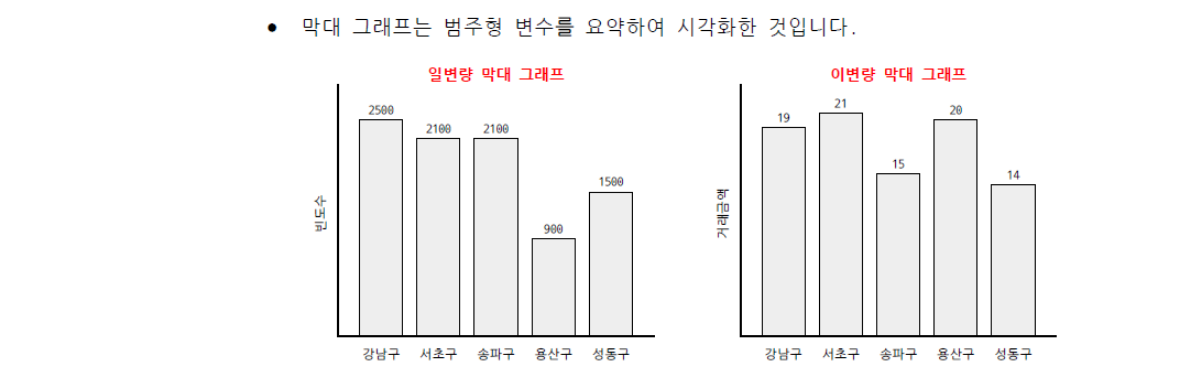

### 일변량 막대 그래프 그리기

In [ ]:
# apt의 자치구별 거래금액 빈도수를 내림차순 정렬한 grp를 생성합니다.
grp = apt.groupby(by = ['자치구'])['거래금액'].count()
grp = grp.sort_values(ascending = False)
grp.head()

In [ ]:
# 자치구별 빈도수로 일변량 막대 그래프를 그립니다.
sns.countplot(data = apt, x = '자치구', order = grp.index)
plt.ylim(0, 4000) # 막대 위에 텍스트를 출력할 공간을 확보하기 위해 y축 범위를 제한합니다.
                  # [주의] 데이터마다 빈도수 범위가 다르므로 미리 확인하고 설정합니다.
plt.xticks(rotation = 45)

# 막대 위에 자치구별 빈도수를 텍스트로 추가합니다.
for i, v in enumerate(grp):
    plt.text(x = i, y = v, s = v, ha = 'center', va = 'bottom', 
             color = 'black', fontsize = 9, fontweight = 'bold')

NameError: name 'sns' is not defined

### 막대 위에 텍스트 추가

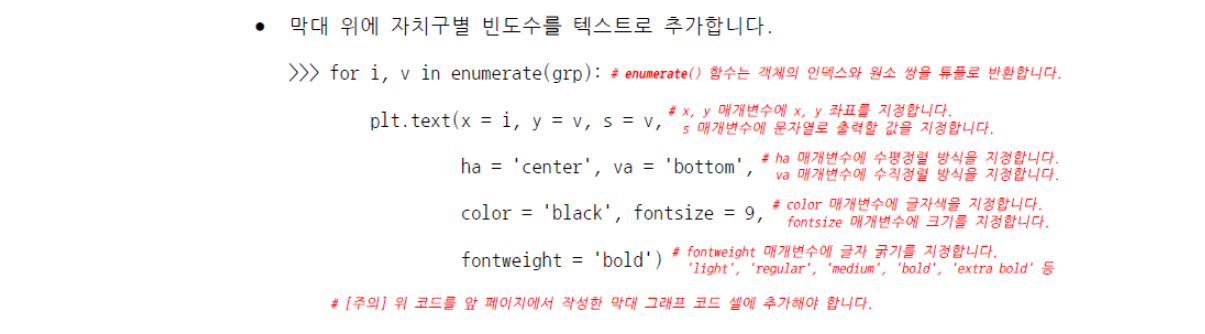

### [참고] plt.text() 함수

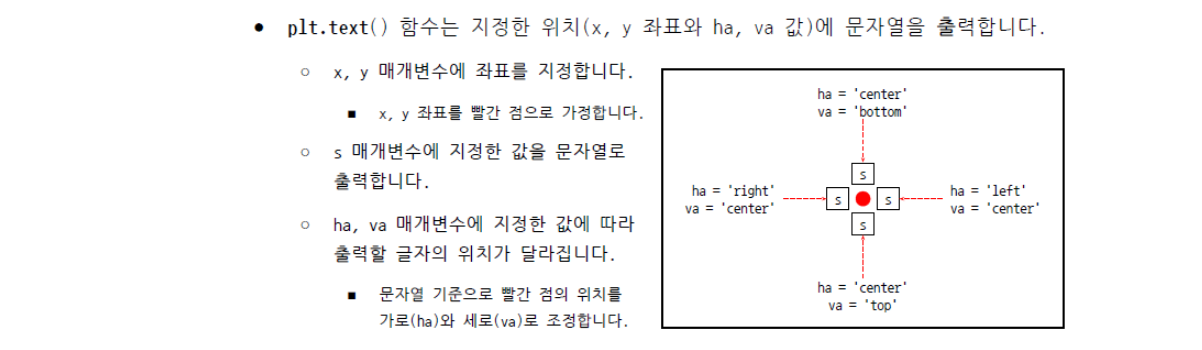

### [참고] 파이 차트 그리기

In [ ]:
# sub의 자치구별 빈도수를 내림차순 정렬한 grp를 생성합니다.
grp = sub['자치구'].value_counts()
grp.head()

In [ ]:
# grp로 파이 차트를 그립니다.
plt.pie(x = grp.values, # 파이 차트의 쐐기(wedge) 크기를 자치구별 빈도수로 지정합니다.
                        # [참고] 파이 차트는 쇄기의 크기를 수치의 백분율로 계산합니다.
        explode = [0, 0, 0.2], # 쐐기별 시작 위치(실수)를 원소로 갖는 리스트로 지정합니다.
                               # [참고] 특정 쐐기를 강조하려면 0보다 큰 값을 지정합니다.
        labels = grp.index, # 꽤기별 라벨을 지정합니다.
                            # [참고] 특정 쐐기를 강조하려면 0보다 큰 값을 지정합니다.
        autopct = '%.1f%%'); # 쐐기 안에 백분율을 출력할 포맷을 지정합니다.
                             # [참고] 백분율 출력 위치의 기본값은 0.6입니다.

In [ ]:
# 원하는 팔레트로 쐐기의 채우기 색을 지정합니다.
wedgeColors = sns.color_palette(palette = 'Spectral')

# 파이 차트의 다양한 그래픽 요소를 변경합니다.
plt.pie(x = grp.values, explode = [0, 0, 0.2], 
        labels = grp.index, autopct = '%.1f%%', 
        colors = wedgeColors, # [참고] 팔레트명을 직접 지정하면 에러를 반환합니다.
        startangle = 90, counterclock = False, # 첫 번째 쐐기 시작 위치와 출력 방향을 변경합니다.
        textprops = dict(color = '0', size = 12), # 글자 색과 크기를 지정합니다.
        wedgeprops = dict(ec = '0.5', lw = 0.5)); # 쐐기의 테두리 색과 선의 두께를 지정합니다.

### 이변량 막대 그래프 그리기

In [ ]:
# apt의 자치구별 거래금액 평균을 내림차순 정렬한 grp를 생성합니다.
grp = apt.groupby(by = ['자치구'])['거래금액'].mean()
grp = grp.sort_values(ascending = False).round(1)
grp.head()

In [ ]:
# 자치구별 거래금액 평균으로 이변량 막대 그래프를 그립니다.
sns.barplot(data = apt, x = '자치구', y = '거래금액', order = grp.index, 
            estimator = np.mean, ci = None)
plt.ylim(0, 22) # estimator 매개변수에 집계함수를 지정합니다.(기본값: 'mean')
                # ci 매개변수에는 95% 신뢰구간 출력 여부를 지정합니다.
                # [참고] 95% 신뢰구간이란 표본 평균이 모평균의 쁠마2 표준편차 안에 
                # 95% 확률로 포함된다는 것을 의미합니다.
plt.xticks(rotation = 45)

# 막대 위에 거래금액 평균을 텍스트로 추가합니다.
for i, v in enumerate(grp):
    plt.text(x = i, y = v, s = v, ha = 'center', va = 'bottom',
             color = 'black', fontsize = 9, fontweight = 'bold')

### [참고] 묶음 막대 그래프 그리기

In [ ]:
# sub의 자치구와 금액구분별 거래금액 평균으로 grp를 생성합니다.
grp = sub.groupby(by = ['자치구', '금액구분'])['거래금액'].mean()
grp = grp.round(1)
grp.head() # [참고] grp는 자치구와 금액구분인 다중인덱스(multiindex)를 갖는데
           # 다중인덱스는 레벨로 구불할 수 있습니다.

In [ ]:
# 이변량 막대 그래프의 x축에 범주형 변수를 추가한 묶음 막대 그래프를 그립니다.
sns.barplot(data = sub, x = '자치구', y = '거래금액', hue = '금액구분', 
            order = grp.index.levels[0], hue_order = grp.index.levels[1],
            estimator = np.mean, ci = None)
plt.ylim(0, 27)

# 묶음 막대 위에 거래금액 평균을 텍스트로 추가합니다.
for i, v in enumerate(grp):
    if i % 2 == 0:
        i = i/2 - 0.2
    else:
        i = (i-1)/2 + 0.2
    plt.text(x = i, y = v, s = v, ha = 'center', va = 'bottom')

NameError: name 'sns' is not defined

### 선 그래프

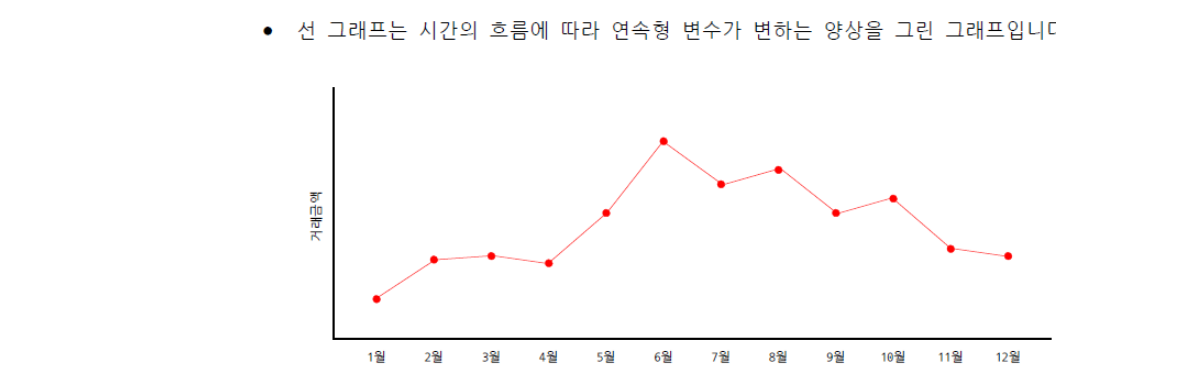

### 선 그래프 그리기

In [ ]:
# 거래월별 거래금액 평균으로 선 그래프를 그립니다.
sns.lineplot(data = apt, x = '거래월', y = '거래금액', color = 'red', 
             estimator = np.mean, ci = None);

In [ ]:
# 선 그래프에 점을 추가합니다.
sns.lineplot(data = apt, x = '거래월', y = '거래금액', color = 'red', 
             estimator = np.mean, ci = None, marker = 'o');

### 선 그래프를 겹쳐서 그리기

In [ ]:
# 자치구별 선 그래프를 겹쳐서 그립니다.
sns.lineplot(data = sub, x = '거래월', y = '거래금액', hue = '자치구', 
             estimator = np.mean, ci = None, marker = 'o');

In [ ]:
# 자치구별로 점 모양을 다르게 설정합니다.
sns.lineplot(data = sub, x = '거래월', y = '거래금액', hue = '자치구', 
             estimator = np.mean, ci = None, markers = True, 
             style = '자치구'); # markers 매개변수에 True, style 매개변수에 범주형 변수를 지정하면
                                # 범주형 변수에 따라 점 모양을 다르게 설정합니다.

NameError: name 'sns' is not defined

### 산점도 그리기

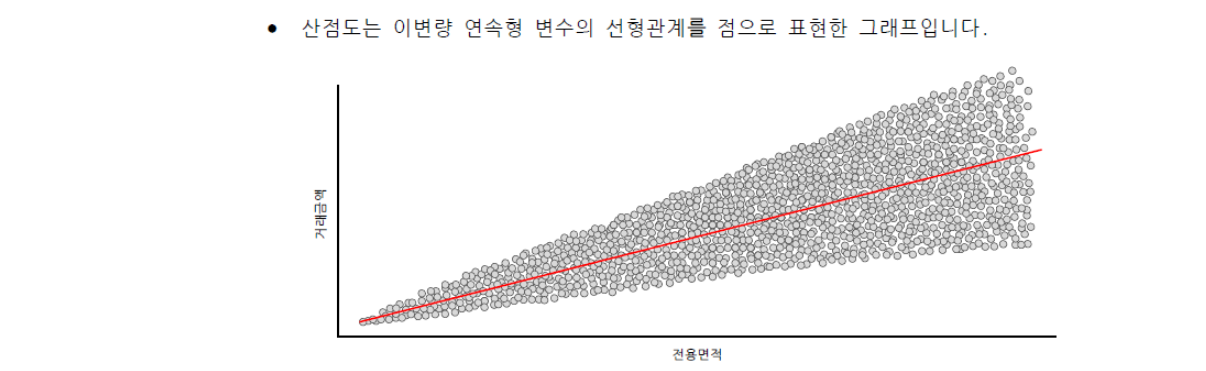

### 산점도 그리기

In [ ]:
# 전용면적과 거래금액으로 산점도를 그립니다.
sns.scatterplot(data = apt, x = '전용면적', y = '거래금액', 
                color = '0.3', # color 매개변수에 점의 채우기 색을 지정합니다.
                               # [참고] 생략하면 기본 팔레트의 첫 번째 색으로 적용합니다.
                ec = '0.8', # edgecolor 매개변수에 점의 테두리 색을 지정합니다.(기본값:'1')
                s = 15,  # s 매개변수에 점의 크기를 지정합니다.(기본값:50)
                alpha = 0.2); # alpha 매개변수에 채우기 색의 투명도를 0(투명) ~ 1(불투명)의 실수로 지정합니다.(기본값:1)

### 점의 채우기 색 변경

In [ ]:
# apt를 세대수로 오름차순 정렬합니다.
apt = apt.sort_values(by = ['세대수'])
# apt를 세대수로 오름차순 정렬하고 아래 산점도를 그리면 세대수가 큰 점이 더욱 뚜렷하게 보입니다.

In [ ]:
# 세대수(연속형 변수)에 따라 채우기 색을 다르게 설정합니다.
sns.scatterplot(data = apt, x = '전용면적', y = '거래금액', 
                hue = '세대수', palette = 'RdYlGn', 
                ec = '0.8', s = 15, alpha = 0.2);

### 강남구 데이터로 산점도 그리기

In [ ]:
# apt에서 강남구만 선택하고 gng에 할당합니다.
gng = apt[apt['자치구'].eq('강남구')]

In [ ]:
# gng로 산점도를 그립니다.
sns.scatterplot(data = gng, x = '전용면적', y = '거래금액', 
                color = '0.3', ec = '0.8', s = 15, alpha = 0.2);

### 산점도에 회귀직선, 수직선 및 수평선 추가

In [ ]:
# 점과 회귀직선 관련 그래픽 요소를 딕셔너리로 생성합니다.
pointProps = dict(color = '0.3', ec = '0.8', s = 15, alpha = 0.2)
regProps = dict(color = 'red', lw = 1.5)

In [ ]:
# 산점도에 회귀직선, 수직선(x 평균) 및 수평선(y 평균)을 추가합니다.
sns.regplot(data = gng, x = '전용면적', y = '거래금액', ci = None, 
            scatter_kws = pointProps, line_kws = regProps)
plt.axvline(x = gng['전용면적'].mean(), lw = 0.5, ls = '--')
plt.axhline(y = gng['거래금액'].mean(), lw = 0.5, ls = '--');

### 산점도 행렬 그리기

In [ ]:
# 산점도 행렬에 추가할 변수명으로 리스트를 생성합니다.
cols = ['거래금액', '전용면적', '층', '세대수'] # [참고] 목표변수명과 입력변수명을 차례대로 지정합니다.

In [ ]:
# 선택한 변수로 산점도 행렬을 그립니다.
sns.pairplot(data = sub[cols], plot_kws = pointProps);

In [ ]:
# x축에 입력변수, y축에 목표변수를 지정하면 산점도 행렬을 간결하게 그립니다.
sns.pairplot(data = sub, 
             x_vars = ['전용면적', '층', '세대수'], 
             y_vars = ['거래금액'], 
             kind = 'reg', 
             plot_kws = dict(scatter_kws = pointProps,
                             line_kws = regProps));

## End of Document